Batch reactor, multiple reactions

\begin{align*}
	& A \xrightarrow{k_B} B && r_1 = k_B\,C_A \\
	& B \xrightarrow{k_C} C && r_2 = k_C\,C_B 
\end{align*}

The ODEs system is:
\begin{align*}
  \frac{d\,C_A}{dt} &= -k_B\,C_A \\
  \frac{d\,C_B}{dt} &= k_B\,C_A - k_C\,C_C\\
  \frac{d\,C_C}{dt} &= k_C\,C_B
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import solve_ivp

In [2]:
params = {
    'axes.labelsize': 'x-large',
    'ytick.labelsize': 'large',
    'xtick.labelsize': 'large'
}
plt.style.use('fivethirtyeight')
rcParams.update(params)

In [3]:
def ode_series(t, C , parameters):
    kb, kc = parameters
    Ca, Cb, Cc = C
    
    dCa_dt = -kb * Ca
    dCb_dt = kb * Ca - kc * Cb
    dCc_dt = kc * Cb
    return [dCa_dt, dCb_dt, dCc_dt]

Let's solve this EDOs system for two values of $k_B$

In [4]:
kc = 1
ca0 = 1        # Initial concentration of A
tfin = 1       # Final reaction time  

# Initial conditions for ODEs system
#     Cao  Cbo  Cco
c0 = [ca0, 0, 0]

In [5]:
kbs = [2, 4]
solutions = []

for kb in kbs:
    data = [kb, kc]
    fun = lambda t, c: ode_series(t, c, data)
    solution = solve_ivp(fun, (0, tfin), c0, 
                         t_eval=np.linspace(0, tfin, num=100))
    solutions.append(solution)

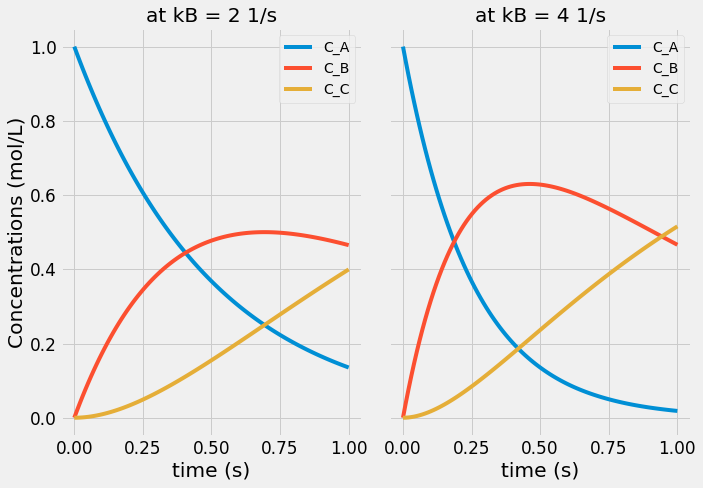

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharey=True)

ax1.plot(solutions[0].t, solutions[0].y.T)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Concentrations (mol/L)')
ax1.set_title('at kB = %.0f 1/s' % kbs[0])

ax2.plot(solutions[1].t, solutions[1].y.T)
ax2.set_xlabel('time (s)')
ax2.set_title('at kB = %.0f 1/s' % kbs[1])
ax1.legend(['C_A','C_B','C_C'])

ax2.legend(['C_A','C_B','C_C'])

plt.tight_layout()
plt.show()